# **导入包**

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
!pip install scltnn
!pip install pyomic
!pip install anndata
!pip install sccoda

In [ ]:
import matplotlib
print('matplotlib(Ver): ',matplotlib.__version__)

In [ ]:
!pip install matplotlib==3.6.3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sc_color=['#7CBB5F',
 '#368650',
 '#A499CC',
 '#5E4D9A',
 '#78C2ED',
 '#866017',
 '#9F987F',
 '#E0DFED',
 '#EF7B77',
 '#279AD7',
 '#F0EEF0',
 '#1F577B',
 '#A56BA7',
 '#E0A7C8',
 '#E069A6',
 '#941456',
 '#FCBC10',
 '#EAEFC5',
 '#01A0A7',
 '#75C8CC',
 '#F0D7BC',
 '#D5B26C',
 '#D5DA48',
 '#B6B812',
 '#9DC3C3',
 '#A89C92',
 '#FEE00C',
 '#FEF2A1']

In [ ]:

#导入包
import anndata
print('anndata(Ver): ',anndata.__version__)
import scanpy as sc
print('scanpy(Ver): ',sc.__version__)
import matplotlib.pyplot as plt
import matplotlib
print('matplotlib(Ver): ',matplotlib.__version__)
import seaborn as sns
print('seaborn(Ver): ',sns.__version__)
import numpy as np
print('numpy(Ver): ',np.__version__)
import pandas as pd
print('pandas(Ver): ',pd.__version__)
import Pyomic
print('Pyomic(Ver): ',Pyomic.__version__)

In [ ]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
adata = sc.read('/content/drive/MyDrive/Gastric/Data/Gastric_anno.h5ad')
adata

AnnData object with n_obs × n_vars = 56791 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'dendrogram_Person', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

# **注释**

https://www.nature.com/articles/s41588-022-01243-4/figures/15

https://static-content.springer.com/esm/art%3A10.1038%2Fs41590-020-0762-x/MediaObjects/41590_2020_762_MOESM1_ESM.pdf

https://www.nature.com/articles/s43587-021-00127-2/figures/10

https://www.nature.com/articles/s41392-021-00753-7/figures/6

https://www.nature.com/articles/s41590-020-0762-x

核心文章 Single-cell analysis of human B cell maturation The Single Cell Immunogenomic Landsc Source Cancer Discov SO 2022

In [20]:
adata.obs.major_celltype

AAACCTGAGCCCAATT-1-HP_POS_2    Epithelial cell
AAACCTGCAATCAGAA-1-HP_POS_2    Epithelial cell
AAACCTGCACTACAGT-1-HP_POS_2    Epithelial cell
AAACCTGCATCGTCGG-1-HP_POS_2    Epithelial cell
AAACCTGGTCGACTAT-1-HP_POS_2    Epithelial cell
                                    ...       
TTTGTCAGTCTTTCAT-1-HP_NEG_2    Epithelial cell
TTTGTCATCCGTCAAA-1-HP_NEG_2    Epithelial cell
TTTGTCATCCTTGCCA-1-HP_NEG_2    Epithelial cell
TTTGTCATCGAACGGA-1-HP_NEG_2    Epithelial cell
TTTGTCATCGCTAGCG-1-HP_NEG_2    Epithelial cell
Name: major_celltype, Length: 56791, dtype: category
Categories (10, object): ['B cell', 'B cell(Plasma cell)', 'Endocrine cell',
                          'Endothelial cell', ..., 'Mast cell', 'Myeloid cell', 'NK/T cell',
                          'Smooth muscle cell']

In [21]:
adata = adata[adata.obs[adata.obs['major_celltype'].str.contains('B cell')].index,:]
adata

View of AnnData object with n_obs × n_vars = 16025 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'dendrogram_Person', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [22]:
adata.obs.Person

AAAGATGGTCCGTGAC-1-HP_POS_2    HP_POS_2
AAAGATGTCACGAAGG-1-HP_POS_2    HP_POS_2
AACACGTCATACCATG-1-HP_POS_2    HP_POS_2
AACGTTGCACTCGACG-1-HP_POS_2    HP_POS_2
AACGTTGTCTCGTTTA-1-HP_POS_2    HP_POS_2
                                 ...   
GTCGGGTGTATGAAAC-1-HP_NEG_2    HP_NEG_2
TACTCATCACCATCCT-1-HP_NEG_2    HP_NEG_2
TAGCCGGTCGTATCAG-1-HP_NEG_2    HP_NEG_2
TCGGTAAGTAGAAGGA-1-HP_NEG_2    HP_NEG_2
TTCGAAGCACCTATCC-1-HP_NEG_2    HP_NEG_2
Name: Person, Length: 16025, dtype: category
Categories (11, object): ['HP_NEG_1', 'HP_NEG_2', 'HP_NEG_3', 'HP_POS_2', ..., 'HP_POS_6', 'HP_POS_7',
                          'HP_POS_8', 'HP_POS_9']

In [23]:
!pip3 install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 56.1 MB/s eta 0:00:00


In [24]:
sc.pp.neighbors(adata, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:34)
running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


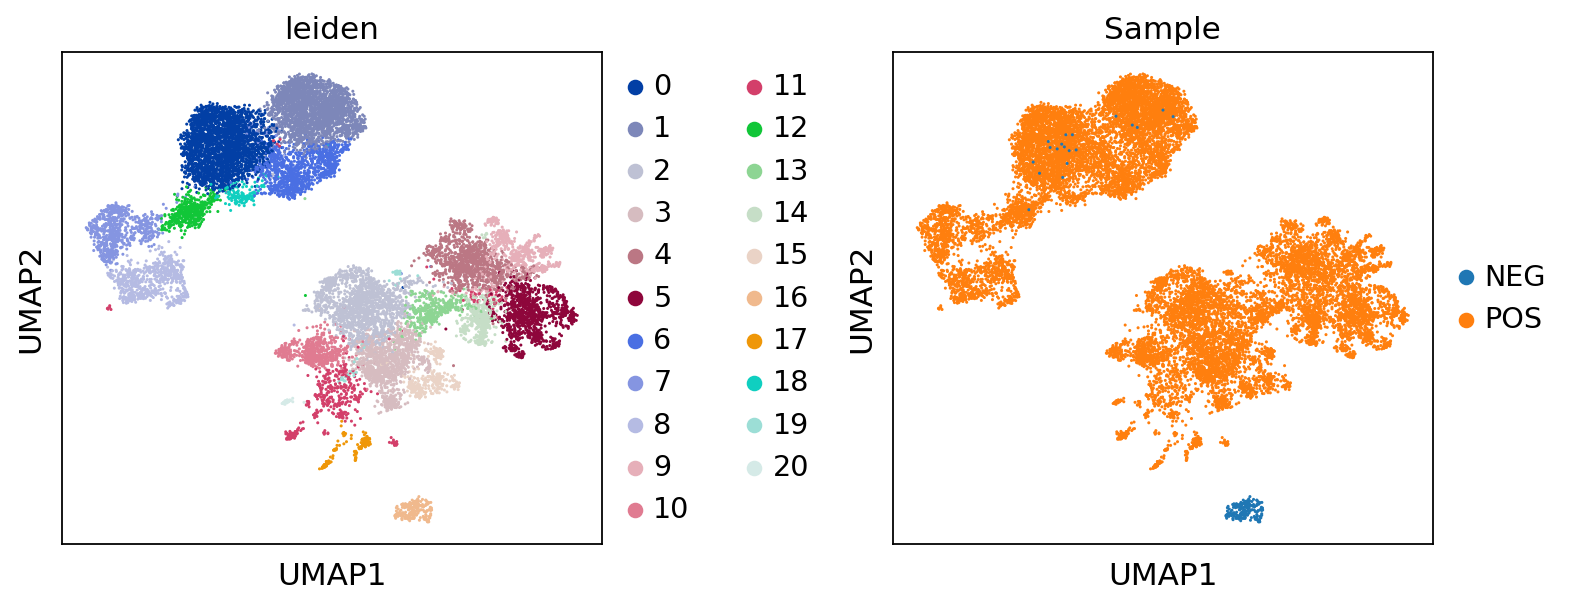

In [25]:
sc.pl.umap(adata,color=['leiden','Sample'],wspace=0.4)

In [26]:
for i in adata.obs['leiden'].cat.categories:
  number = len(adata.obs[adata.obs['leiden']==i])
  print('the number of category {} is {}'.format(i,number))

the number of category 0 is 2602
the number of category 1 is 2438
the number of category 2 is 1548
the number of category 3 is 1150
the number of category 4 is 1108
the number of category 5 is 1052
the number of category 6 is 1048
the number of category 7 is 696
the number of category 8 is 671
the number of category 9 is 561
the number of category 10 is 551
the number of category 11 is 453
the number of category 12 is 431
the number of category 13 is 403
the number of category 14 is 397
the number of category 15 is 344
the number of category 16 is 190
the number of category 17 is 171
the number of category 18 is 137
the number of category 19 is 40
the number of category 20 is 34


In [27]:
adata = adata[adata.obs[adata.obs['leiden'].astype(int)<19].index]
adata

View of AnnData object with n_obs × n_vars = 15951 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'dendrogram_Person', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [28]:
marker_genes_dict = {
    'Epithelial cell':['MUC5AC','MUC1','CDH1'],#上皮细胞
    'Endocrine cell':['CHGA','PCSK1N','SCG5'],#内分泌细胞,
    'Myeloid cell':['AIF1','CD68','MS4A7'],#髓系细胞
    'Mast cell':['TPSAB1','TPSB2','CPA3'],#肥大细胞
    'Fibroblast':['DCN','DPT','PDGFRA'],#成纤维细胞
    'NK/T cell':['CD2','CD3E','CD7'], 
    'Smooth muscle cell':['ACTA2','MYH11','ACTG2'],#平滑肌细胞
    'Endothelial cell':['CLDN5','PECAM1','ACKR1'],#内皮细胞
}

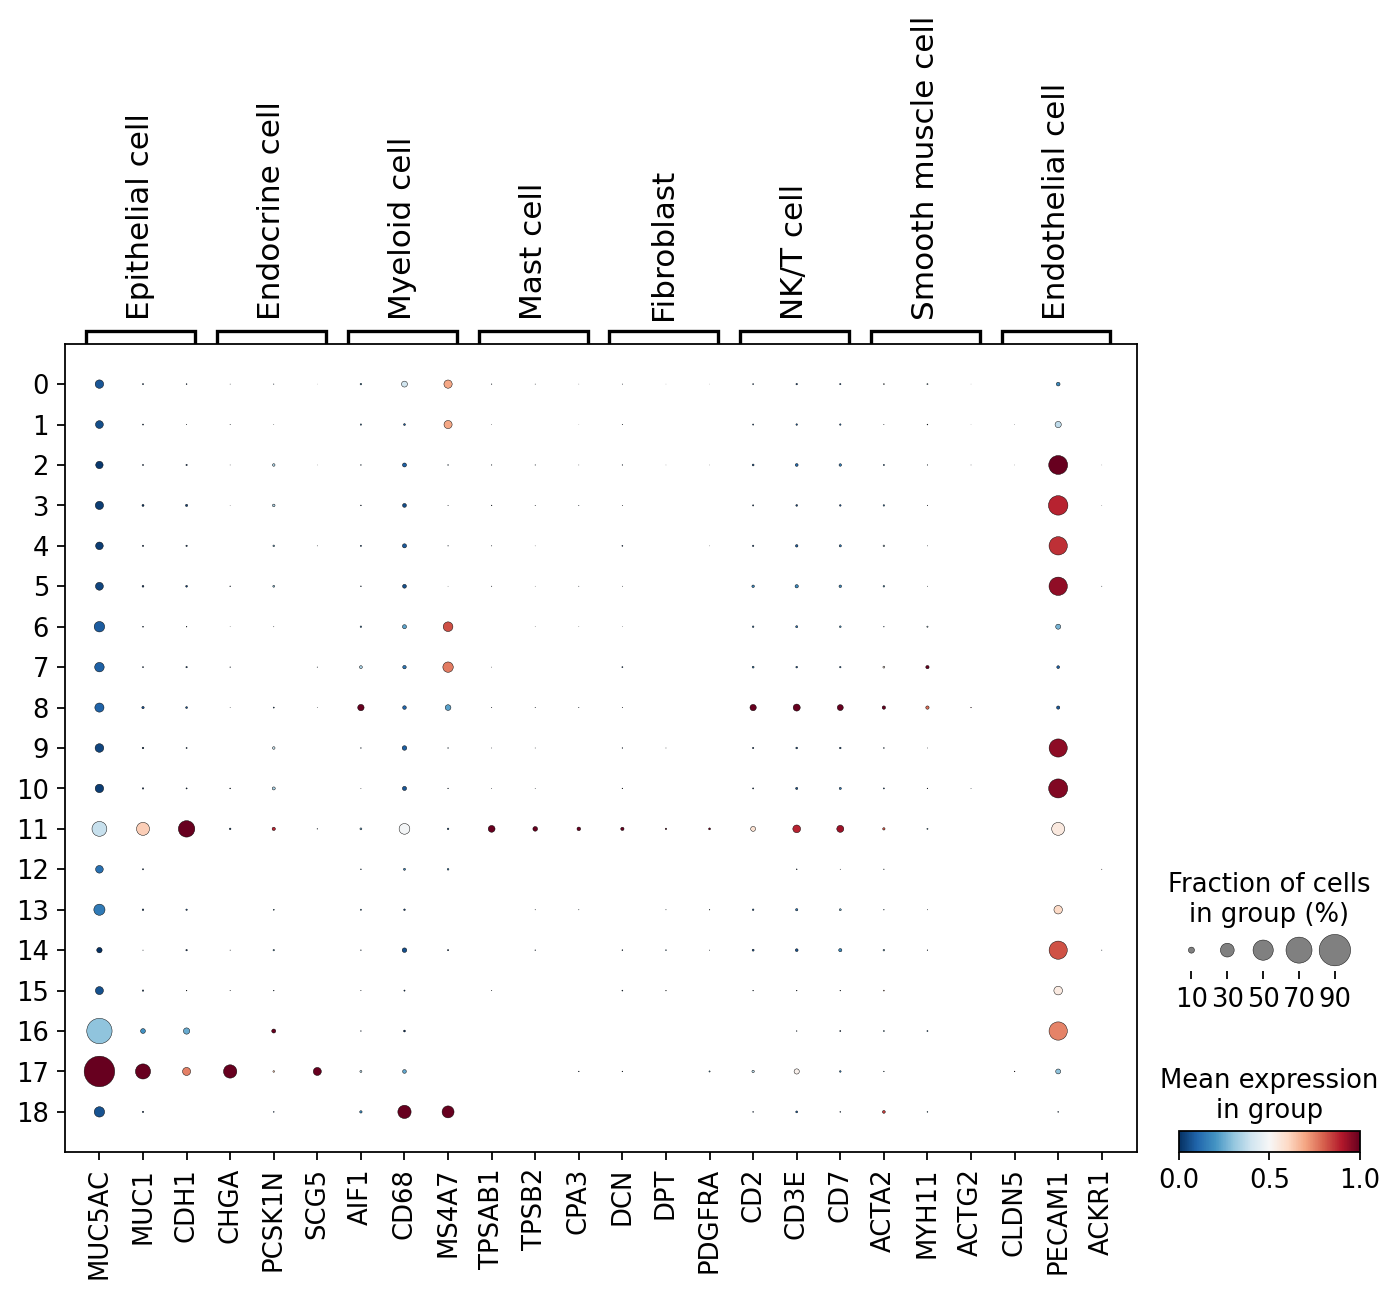

In [29]:
#sc.tl.dendrogram(adata,groupby='major_celltype')
sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby='leiden',
    dendrogram=False,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

In [30]:
adata = adata[adata.obs['leiden']!='18']
adata = adata[adata.obs['leiden']!='17']
adata = adata[adata.obs['leiden']!='11']
adata

View of AnnData object with n_obs × n_vars = 15190 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'dendrogram_Person', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

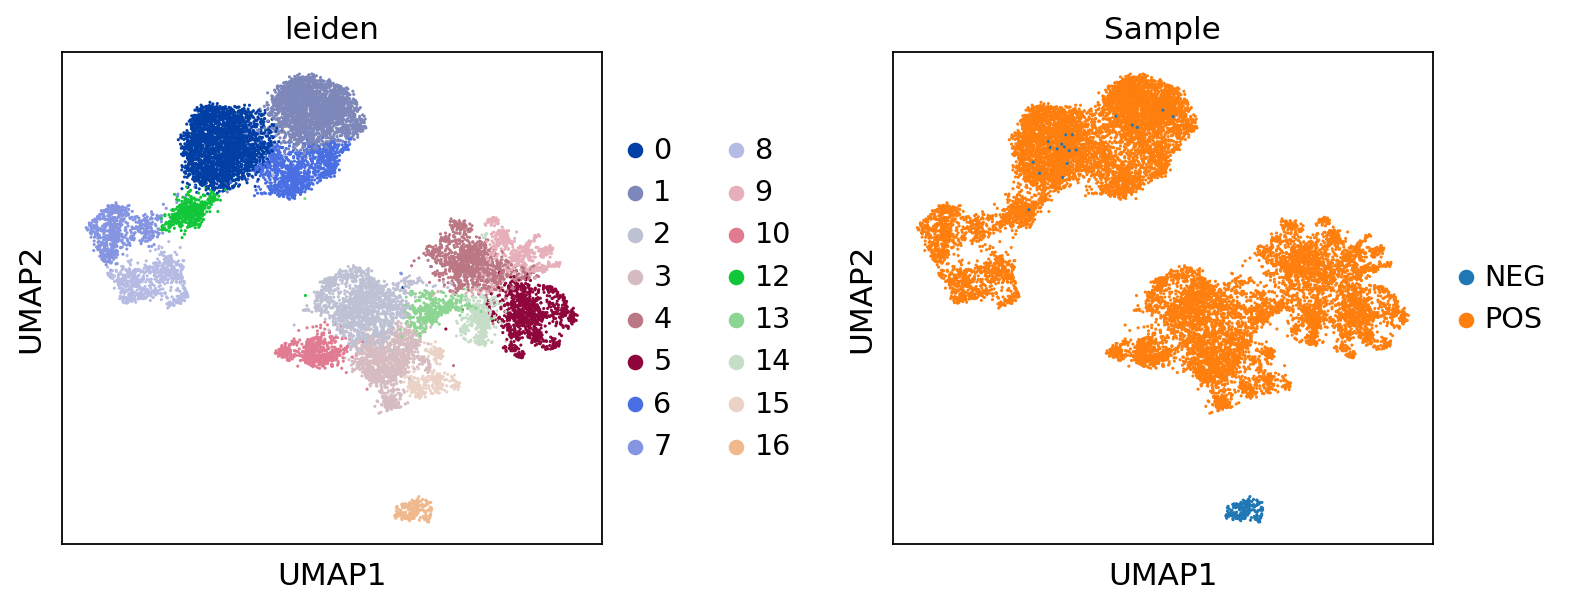

In [31]:
sc.pl.umap(adata,color=['leiden','Sample'],wspace=0.4)

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_leiden']`


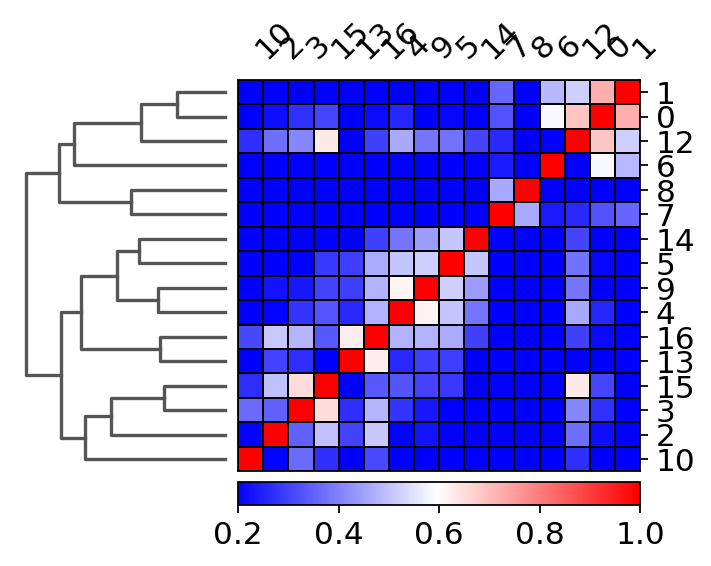

In [32]:
sc.tl.dendrogram(adata, 'leiden')
ax = sc.pl.correlation_matrix(adata, 'leiden', figsize=(5,3.5),vmin=0.2)

In [33]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '0': 'Memory_B',#上皮细胞
    '1': 'Naive_B',
    '5': 'Activated_B', #相关基因表达不明显
    '7': 'Germinal_Center_B', #和naiveB差别是NEIL1 #生发中心B细胞
    '8': 'Cycling', #生发中心基因高表达，同时高表达cycling基因 
    '12': 'Ribosome_B',
    '2': 'Other',
    '3': 'Other',
    '4': 'Other',
    '6': 'Other',
    '9': 'Other',
    '10': 'Other',
    '11': 'Other',
    '13': 'Other',
    '14': 'Other',
    '15': 'Other',
    '16': 'Other',
    '17': 'Other',
    '18': 'Other',
}
adata.obs['B_celltype'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

In [34]:
adata_B = adata[adata.obs.B_celltype!='Other']
adata_B

View of AnnData object with n_obs × n_vars = 7890 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'B_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'dendrogram_Person', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [35]:
# 对adata_B.obs.B_celltype的categories重排序
adata_B.obs.B_celltype.cat.reorder_categories(['Memory_B','Naive_B','Activated_B','Germinal_Center_B','Cycling', 'Ribosome_B'],ordered=True,inplace=True)

In [36]:
marker_genes_dict = {
    'Epithelial cell':['CD19','CD19','CD79A','MS4A1','BANK1','BLK','CD27',
              'TNFRSF13B','IGHD','FCER2','TCL1A','IGHM','MKI67','CDK1'
              ,'TOP2A','MZB1','SDC1','JCHAIN','IGHA1','IGHA2','IGHG1','IGHG3','IGHG2']}

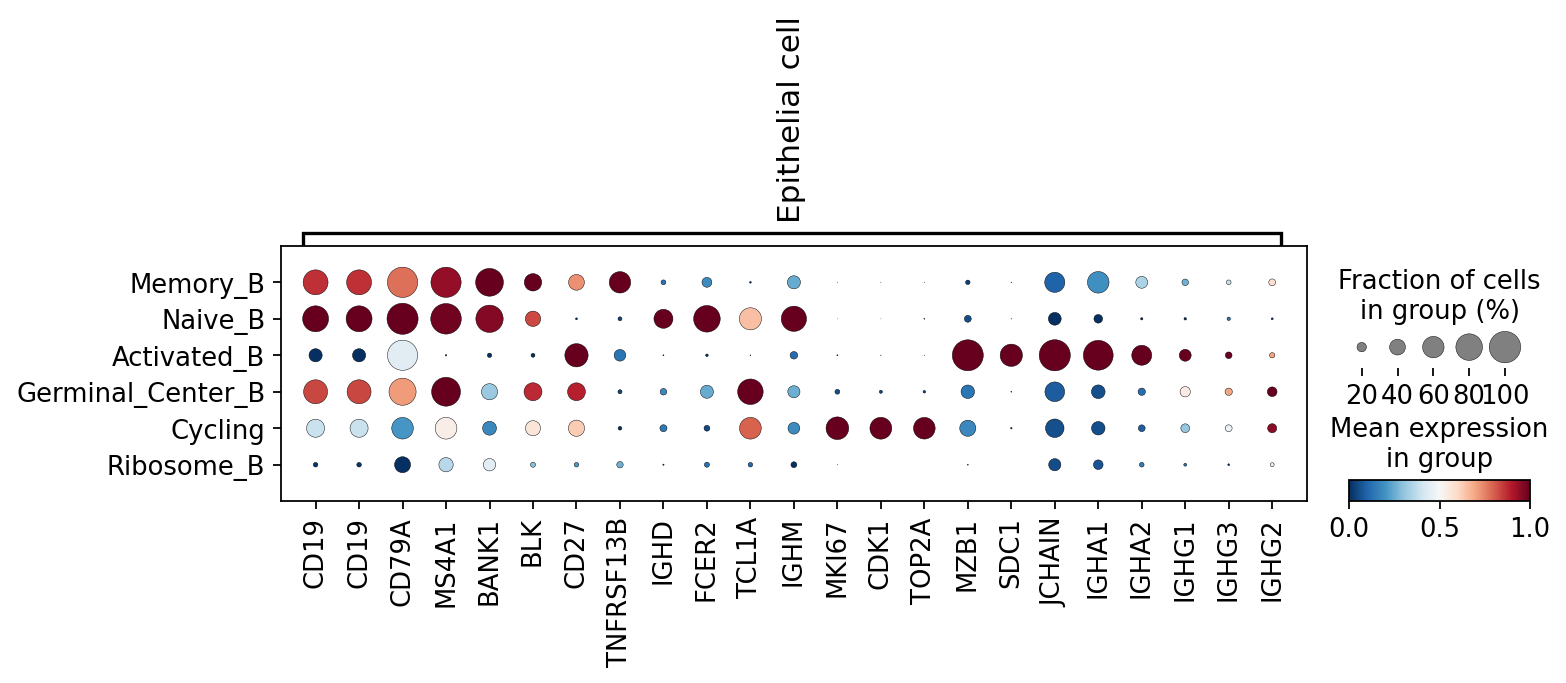

In [37]:
#sc.tl.dendrogram(adata,groupby='major_celltype')
sc.pl.dotplot(
    adata_B,
    marker_genes_dict,
    groupby='B_celltype',
    dendrogram=False,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

In [38]:
marker_genes_dict = {
    'Epithelial cell':['CD19','TXNIP','FCER2','FCMR','SELL','BANK1','EGR1','CD69','DUSP2','JUN','IL6'
    ,'CCND2','MIR155HG','PSME2','BHLHE40','PARVB','EBI3','BCL2A1','LMO2','GMDS','PRPSAP2','SERPINA9',
    'MARCKSL1','CD27','CD38','BCL6','SUGCT','EZR','ISG20','AICDA','FCRL3','FCRL2','LINC01857','SAMSN1',
    'RASSF6','FRZB','HOPX','BTNL9','FGFR1','JCHAIN','PRDM1','XBP1','MZB1','SSR4','GPR183','CD44','KLF2',
    'TNFRSF13B','VIM','PLAC8','FCRL4','CCR1','ITGAX','HMGB2','TUBA1B','MKI67','UBE2C','AURKB'
]}

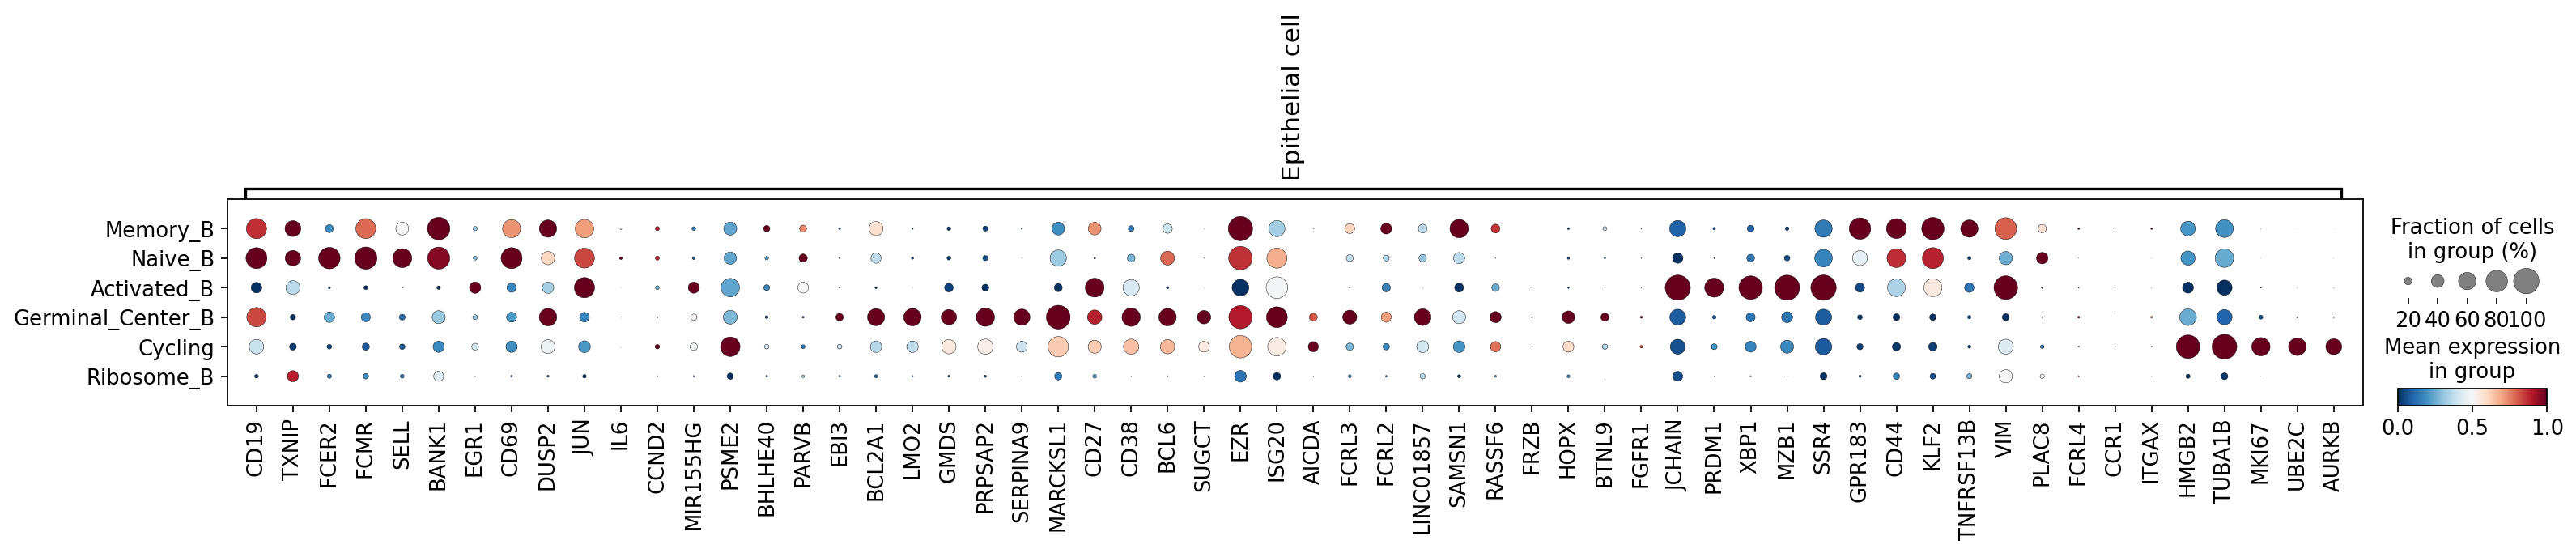

In [39]:
#sc.tl.dendrogram(adata,groupby='major_celltype')
sc.pl.dotplot(
    adata_B,
    marker_genes_dict,
    groupby='B_celltype',
    dendrogram=False,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

In [40]:
marker_genes_dict = {
    'B':['MS4A1'],
    'Mermory_B':['GPR183','CD27','KLF2','TNFRSF13B','VIM'],
    'Naive_B':['CD19','FCER2','FCMR','SELL','IGHD'],
    'Activated_B':['BCL2A1','EGR1','CD69','DUSP2','JUN'],
    'Germinal_Center_B':['LMO2','GMDS','PRPSAP2','SERPINA9','MARCKSL1'],#生发中心B
    'Cycling':['HMGB2','TUBA1B','MKI67','UBE2C','AURKB'],
    'Ribosome_B':['RPLP1','RPL32','RPL11','RPS18','RPS15A']
    
    #对B细胞亚群进行进一步分群，获得了一个 naive B 亚型 (MS4A1+IGHD+), 
    #一个memory B 亚型(MS4A1+CD27+), 
    #一个intermediate transition memory B 亚型 (intermediate memory B; IGHD+CD27+), 
    #one germinal center B 亚型 (MS4A1+NEIL1+) 
    #和两个 plasma亚型：plasma B (MZB1+CD38+) and dividing plasma B (MZB1+CD38+MKI67+)。


}

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_major_celltype']`


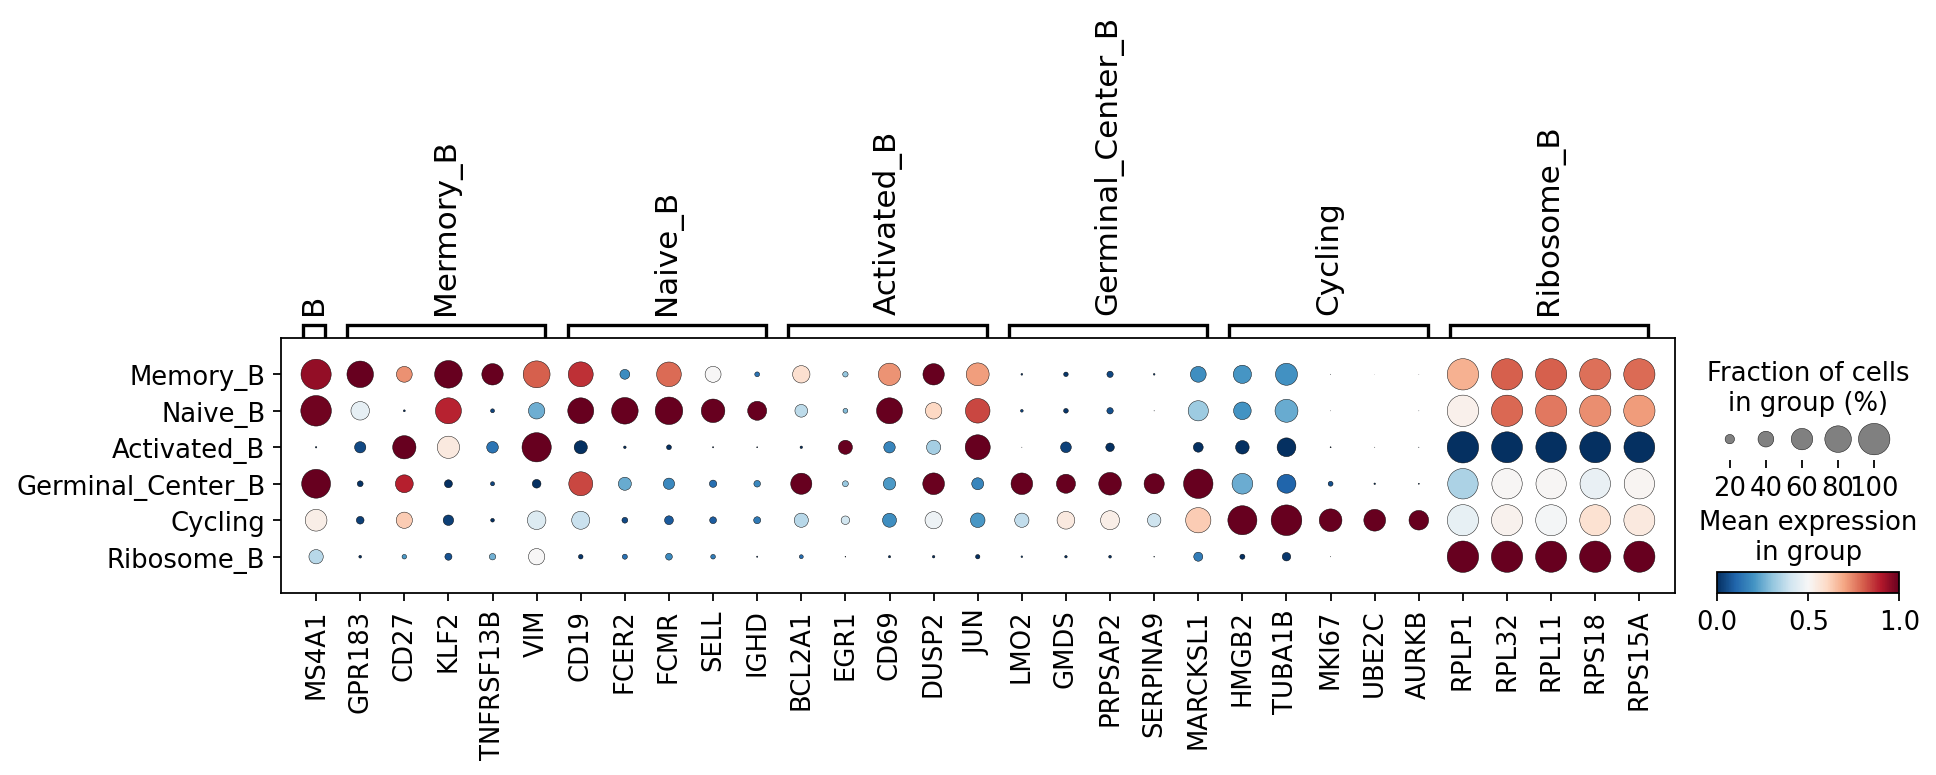

In [41]:
sc.tl.dendrogram(adata_B,groupby='major_celltype')
sc.pl.dotplot(
    adata_B,
    marker_genes_dict,
    groupby='B_celltype',
    dendrogram=False,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_B_celltype']`


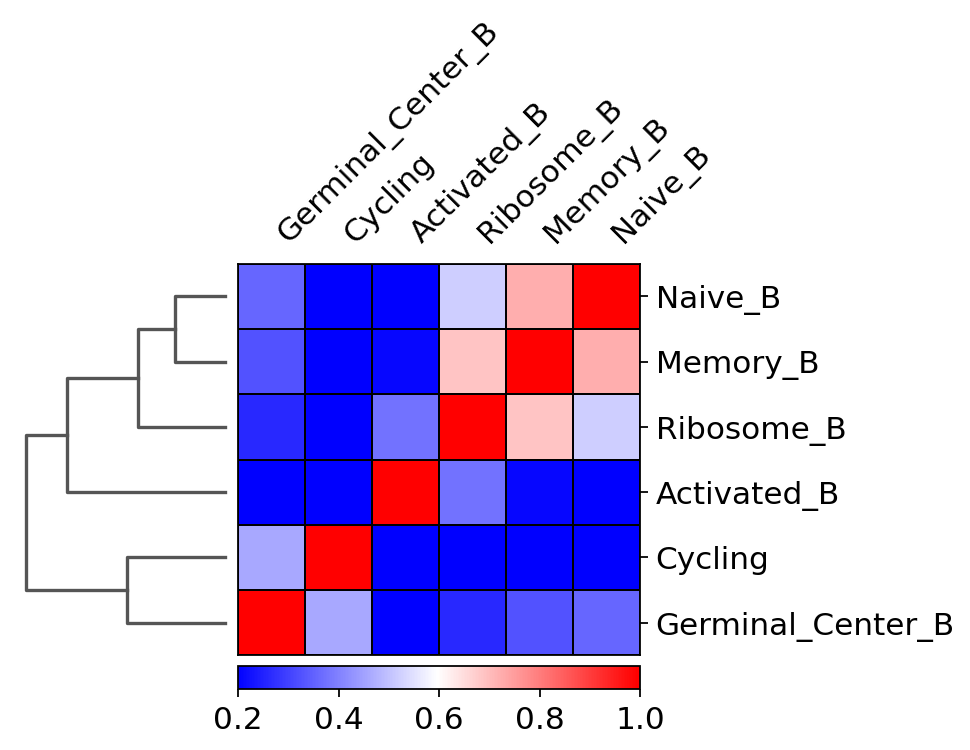

In [42]:
sc.tl.dendrogram(adata_B, 'B_celltype')
ax = sc.pl.correlation_matrix(adata_B, 'B_celltype', figsize=(5,3.5),vmin=0.2)

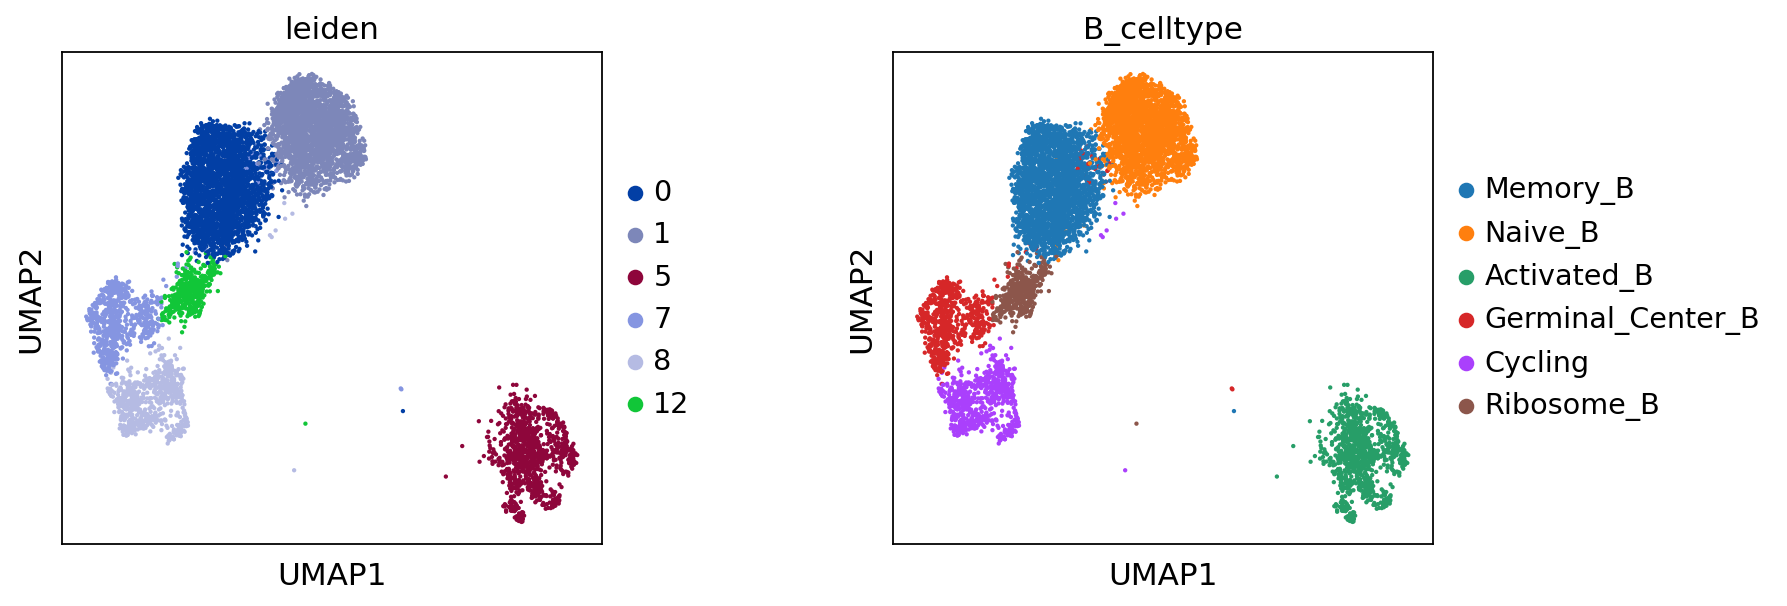

In [43]:
sc.pl.umap(adata_B,color=['leiden','B_celltype'],wspace=0.4)

In [44]:
adata_Plasma = adata[adata.obs.B_celltype=='Other']
adata_Plasma

View of AnnData object with n_obs × n_vars = 7300 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'B_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'dendrogram_Person', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [45]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '2': 'lgA2_PC',
    '3': 'lgG_PC',
    '4': 'lgA1_PC',
    '6': 'lgA1_PC',
    '9': 'lgA1_PC',
    '10': 'lgA2_PC',
    '13': 'Stressed_PC', #高表达HSPB1（细胞伴侣，应激状态）
    '14': 'lgA1_PC',
    '15': 'lgA2_PC',
    '16': 'Plasmablast',
}
adata_Plasma.obs['B_celltype'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

In [46]:
# 对adata_B.obs.B_celltype的categories重排序
adata_Plasma.obs.B_celltype.cat.reorder_categories(['Plasmablast','Stressed_PC','lgG_PC','lgA1_PC','lgA2_PC'],ordered=True,inplace=True)

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_B_celltype']`


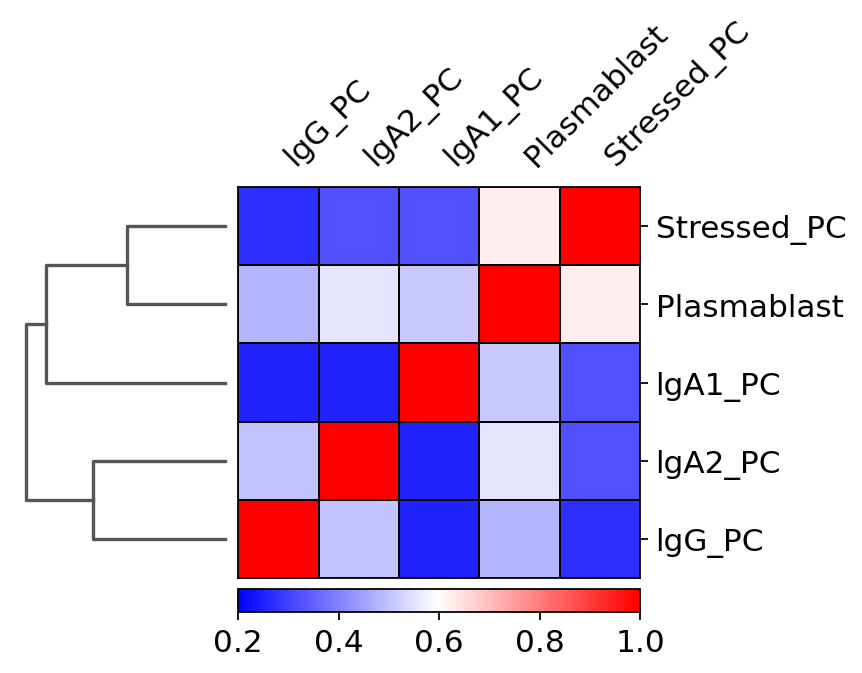

In [47]:
sc.tl.dendrogram(adata_Plasma, 'B_celltype')
ax = sc.pl.correlation_matrix(adata_Plasma, 'B_celltype', figsize=(5,3.5),vmin=0.2)

In [48]:
marker_genes_dict = {
    #'Epithelial cell':['MZB1','XBP1','HSP90B1','DERL3','HSPA5'],
  #  'Plasma':['JCHAIN','MZB1','SDC1','TNFRSF17'],
    'Plasmablast':['CD38','SDC1','CD27','TUBB'], #完全不表达MKI67，表明不处于增值状态
    'SPC':['HSPB1'], 
    'lgG PC':['IGHG1','IGHG2','IGHG3','IGHG4',],
    'lgA1 PC':['IGHA1'],
    'lgA2 PC':['IGHA2'],


    }

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_B_celltype']`


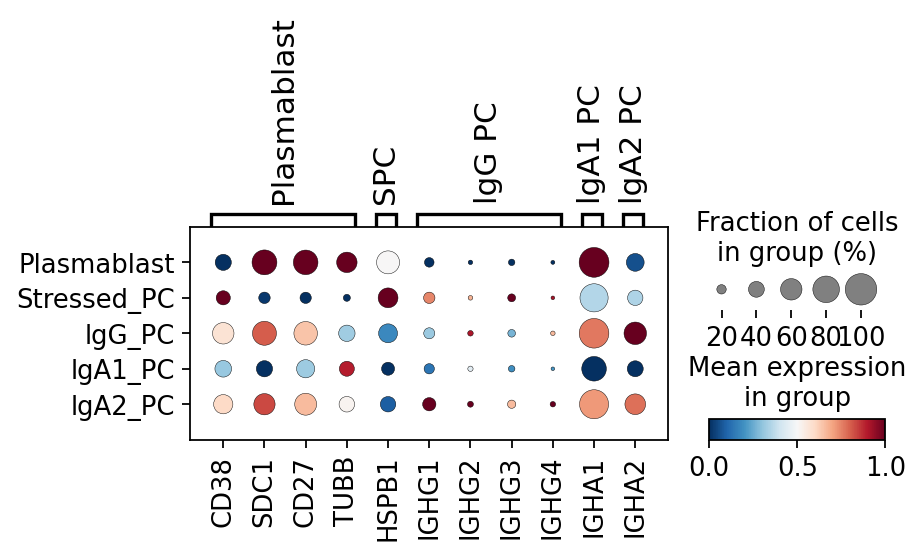

In [49]:
sc.tl.dendrogram(adata_Plasma,groupby='B_celltype')
sc.pl.dotplot(
    adata_Plasma,
    marker_genes_dict,
    groupby='B_celltype',
    dendrogram=False,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

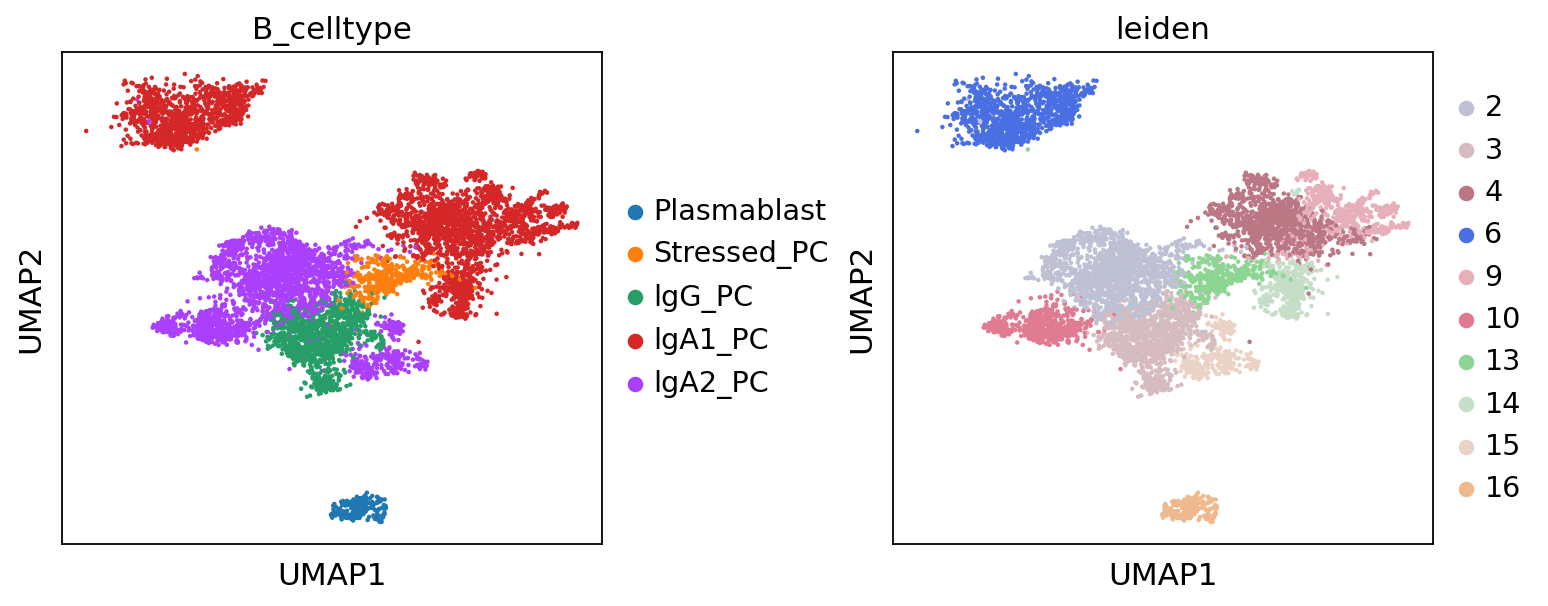

In [50]:
sc.pl.umap(adata_Plasma,color=['B_celltype','leiden'],wspace=0.4)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:13)
    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_B_celltype']`


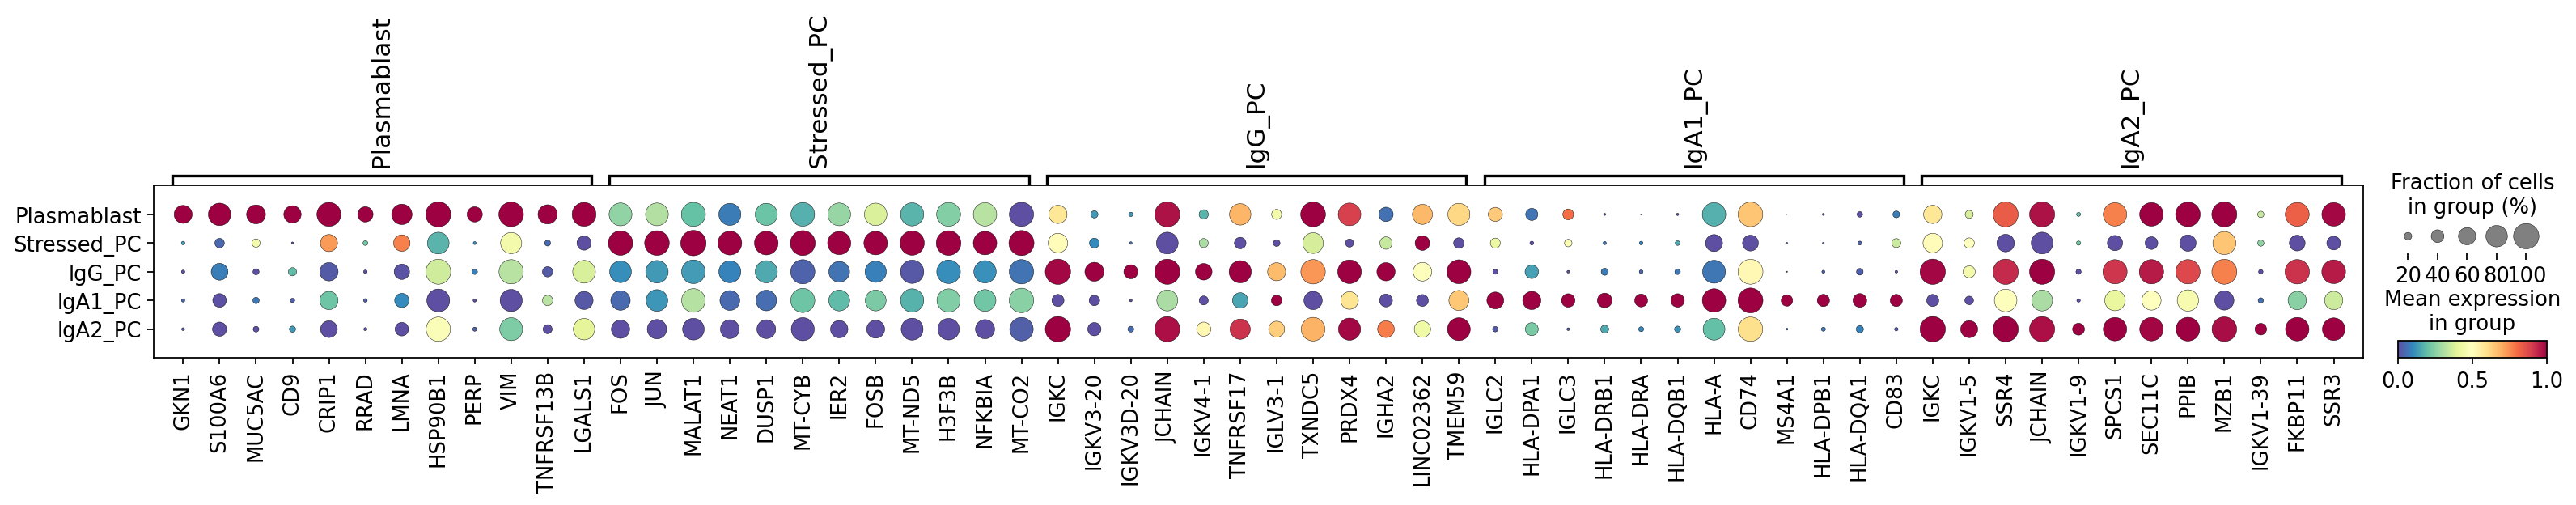

In [51]:
adata_Plasma.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(adata_Plasma, 'B_celltype', method='wilcoxon')
sc.tl.dendrogram(adata_Plasma,groupby='B_celltype')
sc.pl.rank_genes_groups_dotplot(adata_Plasma,groupby='B_celltype',dendrogram=False,
                                cmap='Spectral_r',
                                standard_scale='var',n_genes=12)


In [52]:
adata.obs.leiden

AAAGATGGTCCGTGAC-1-HP_POS_2     0
AAAGATGTCACGAAGG-1-HP_POS_2     2
AACGTTGCACTCGACG-1-HP_POS_2    12
AACGTTGTCTCGTTTA-1-HP_POS_2     2
AACTCTTCAGTTCATG-1-HP_POS_2     2
                               ..
GTCGGGTGTATGAAAC-1-HP_NEG_2    16
TACTCATCACCATCCT-1-HP_NEG_2    16
TAGCCGGTCGTATCAG-1-HP_NEG_2     0
TCGGTAAGTAGAAGGA-1-HP_NEG_2    16
TTCGAAGCACCTATCC-1-HP_NEG_2    16
Name: leiden, Length: 15190, dtype: category
Categories (16, object): ['0', '1', '2', '3', ..., '13', '14', '15', '16']

In [53]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '0': 'Memory_B',#上皮细胞
    '1': 'Naive_B',
    '5': 'Activated_B', #相关基因表达不明显
    '7': 'Germinal_Center_B', #和naiveB差别是NEIL1 #生发中心B细胞
    '8': 'Cycling', #生发中心基因高表达，同时高表达cycling基因 
    '12': 'Ribosome_B',
    '2': 'lgA2_PC',
    '3': 'lgG_PC',
    '4': 'lgA1_PC',
    '6': 'lgA1_PC',
    '9': 'lgA1_PC',
    '10': 'lgA2_PC',
    '13': 'Stressed_PC', #高表达HSPB1（细胞伴侣，应激状态）
    '14': 'lgA1_PC',
    '15': 'lgA2_PC',
    '16': 'Plasmablast',
}
adata.obs['B_celltype'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

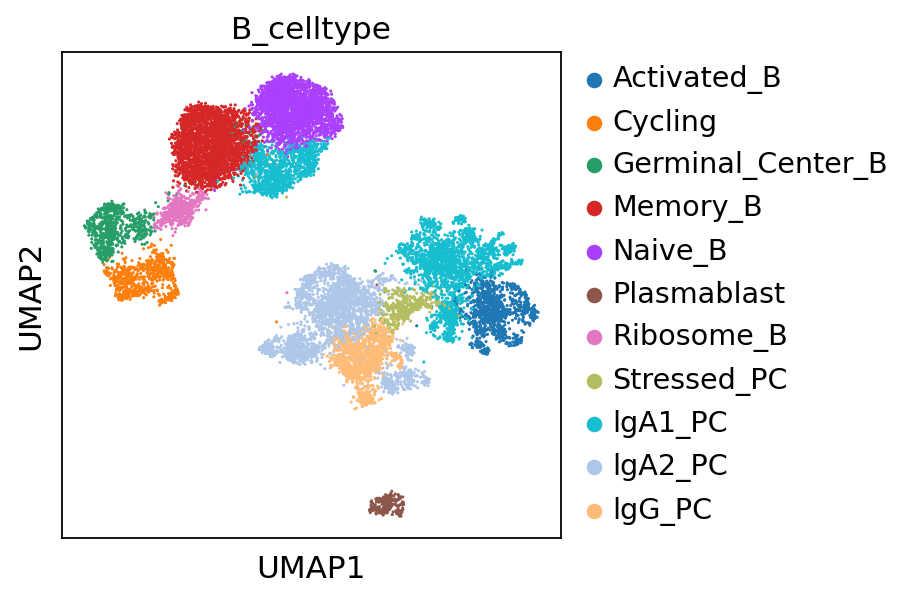

In [54]:
sc.pl.umap(adata,color=['B_celltype'])

# **拟时序**

In [55]:
from matplotlib import rcParams

In [ ]:
!pip install scltnn

In [ ]:
!pip install scvelo

In [ ]:
!pip install docrep

In [ ]:
!pip install scipy

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install statsmodels

In [62]:
import scltnn

In [67]:
import scvelo as scv

In [68]:
import seaborn as sns

In [66]:
adata

AnnData object with n_obs × n_vars = 15190 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'B_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'dendrogram_Person', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'B_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [71]:
sc.tl.paga(adata, groups='leiden')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


    'B':['MS4A1'],
    'Mermory_B':['GPR183','CD27','KLF2','TNFRSF13B','VIM'],
    'Naive_B':['CD19','FCER2','FCMR','SELL','IGHD'],
    'Activated_B':['BCL2A1','EGR1','CD69','DUSP2','JUN'],
    'Germinal_Center_B':['LMO2','GMDS','PRPSAP2','SERPINA9','MARCKSL1'],#生发中心B
    'Cycling':['HMGB2','TUBA1B','MKI67','UBE2C','AURKB'],
    'Ribosome_B':['RPLP1','RPL32','RPL11','RPS18','RPS15A']

--> added 'pos', the PAGA positions (adata.uns['paga'])


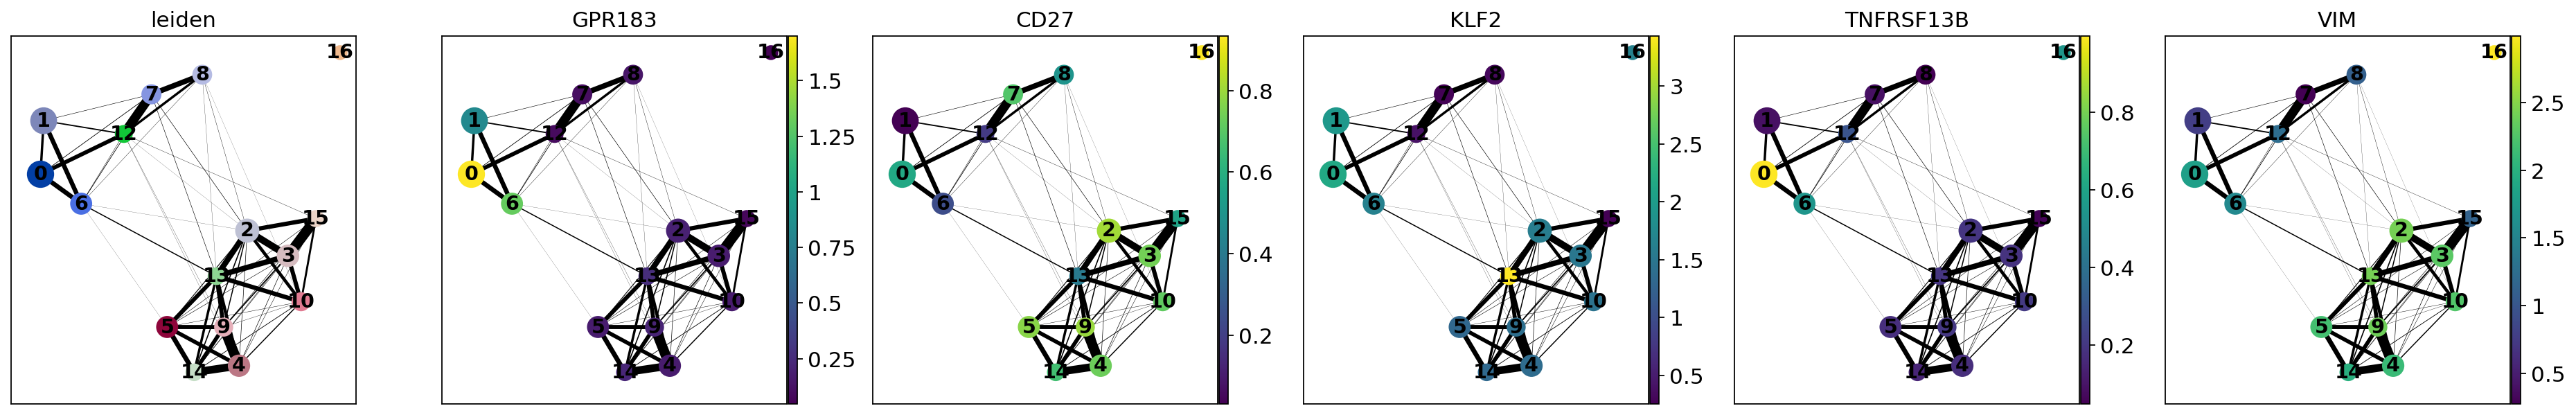

In [72]:
sc.pl.paga(adata, color=['leiden', 'GPR183', 'CD27', 'KLF2','TNFRSF13B','VIM'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


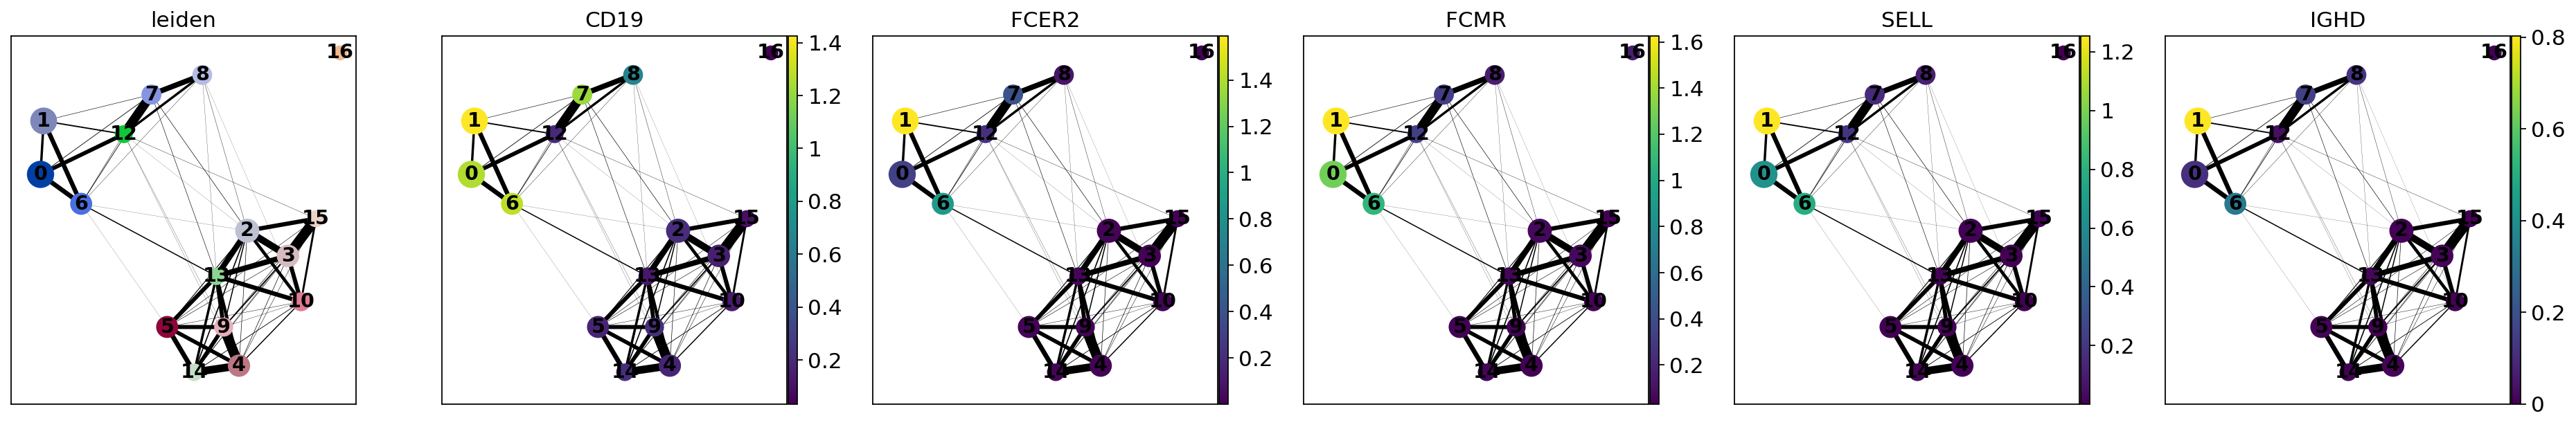

In [73]:
sc.pl.paga(adata, color=['leiden', 'CD19','FCER2','FCMR','SELL','IGHD'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


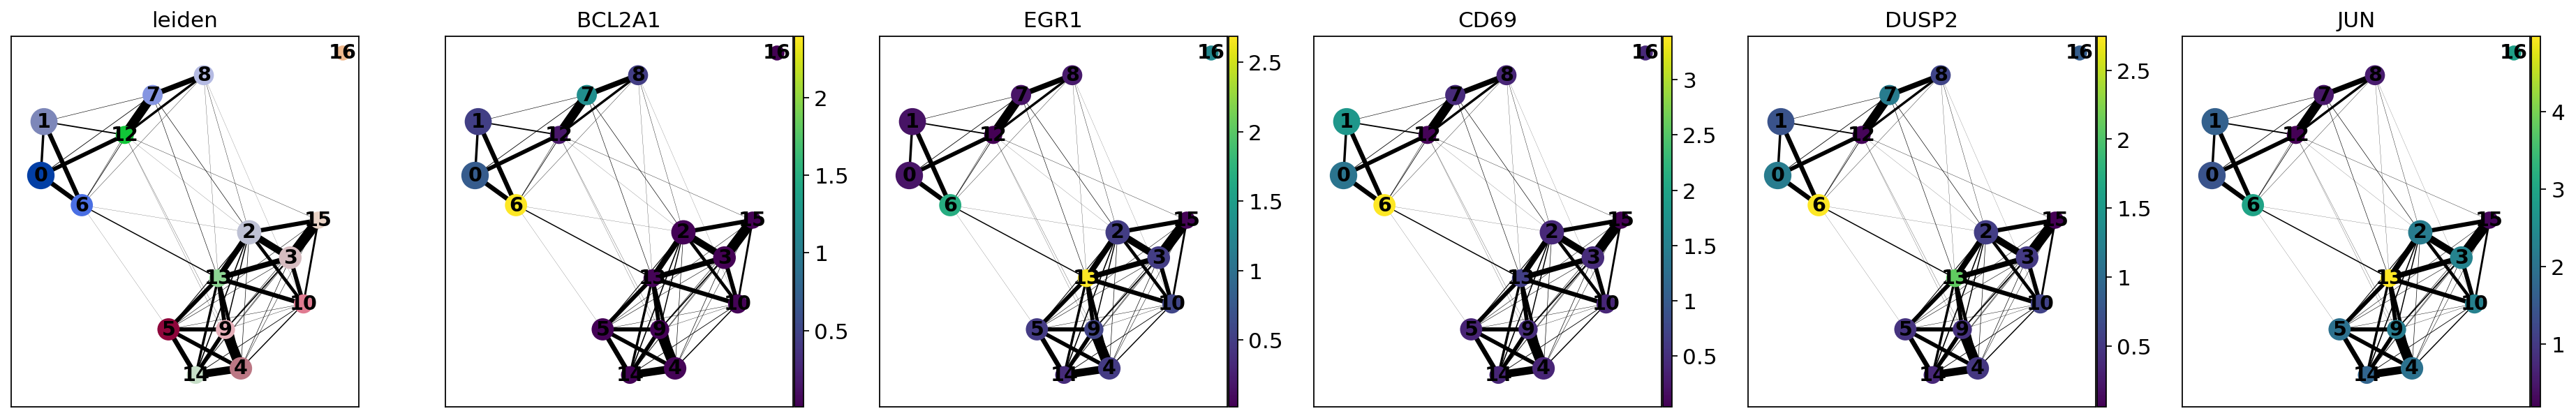

In [74]:
sc.pl.paga(adata, color=['leiden' ,'BCL2A1','EGR1','CD69','DUSP2','JUN'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


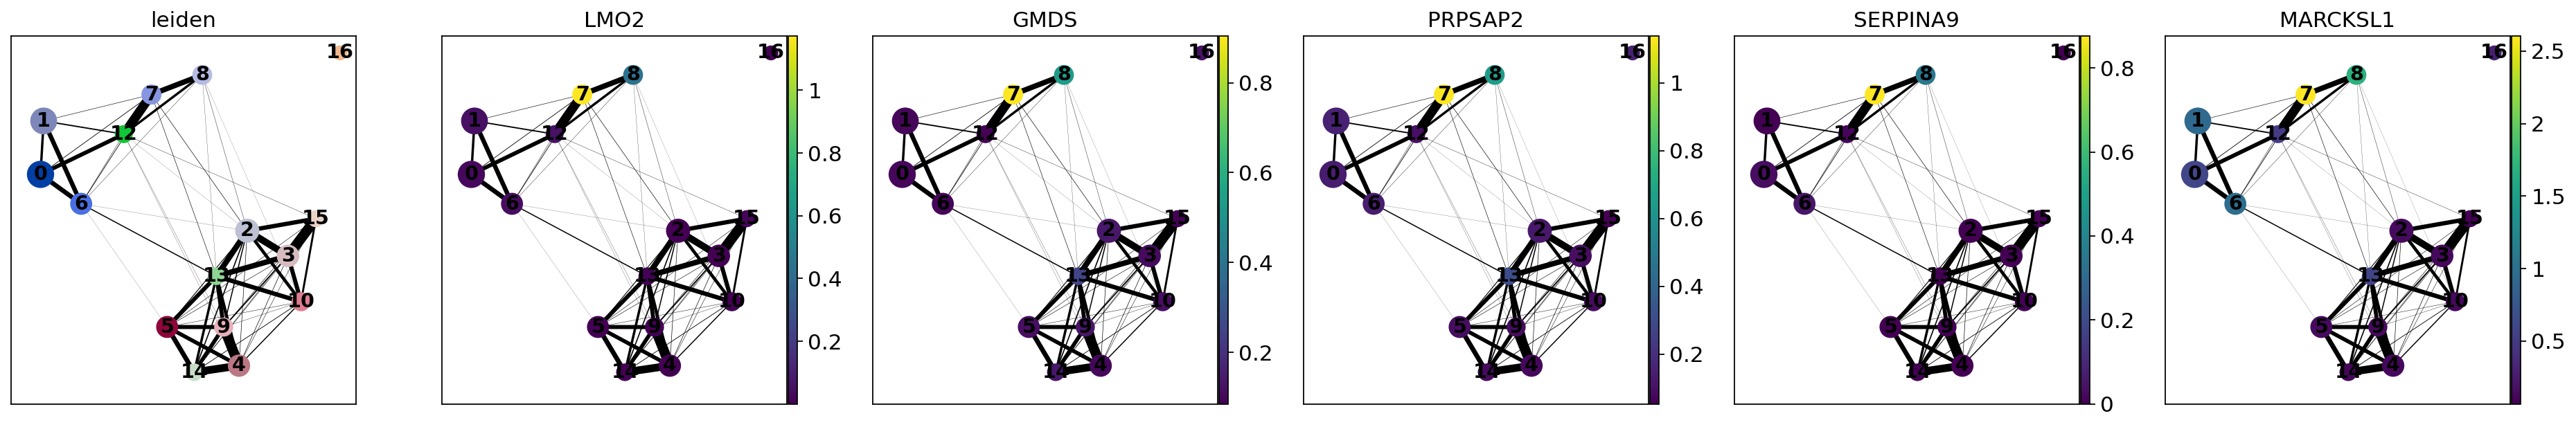

In [75]:
sc.pl.paga(adata, color=['leiden' ,'LMO2','GMDS','PRPSAP2','SERPINA9','MARCKSL1'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


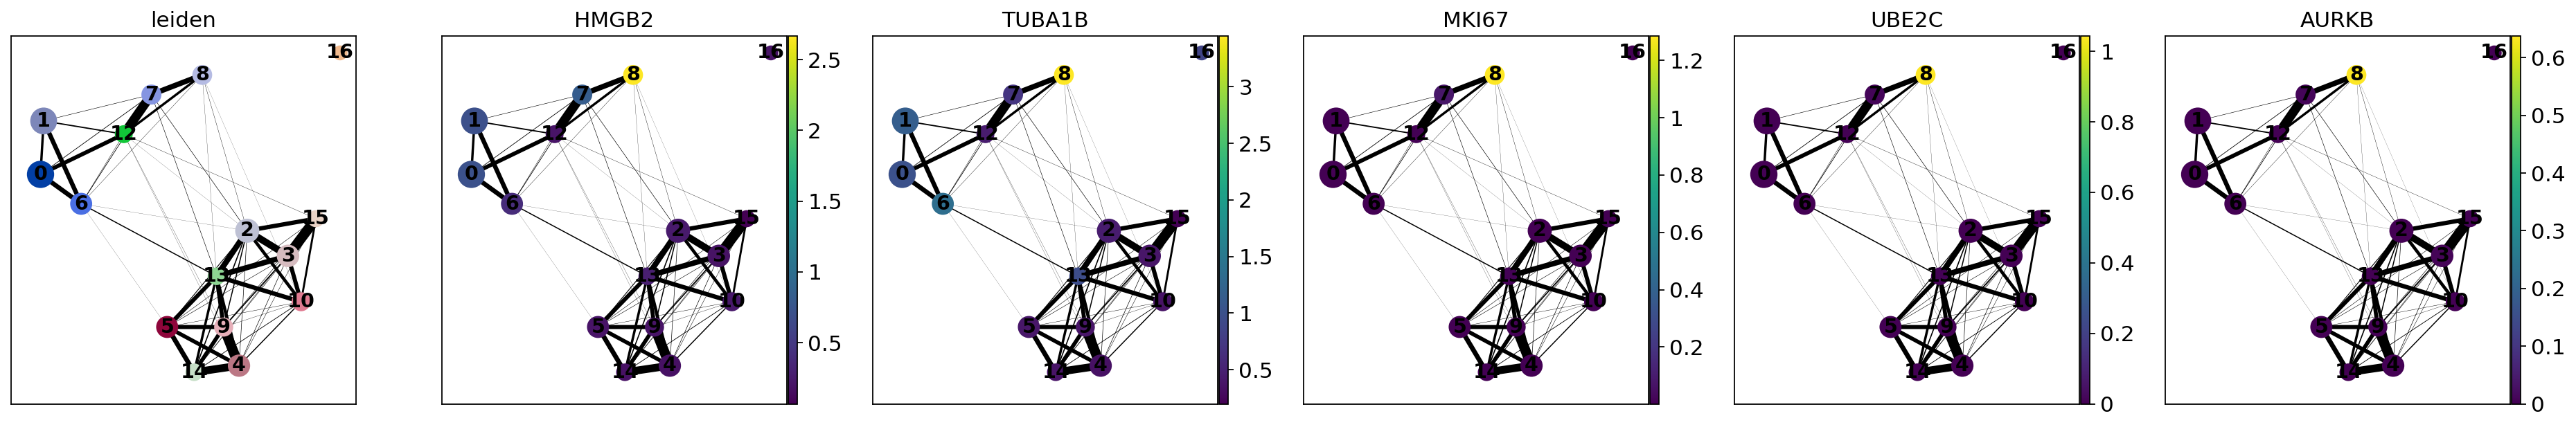

In [76]:
sc.pl.paga(adata, color=['leiden' ,'HMGB2','TUBA1B','MKI67','UBE2C','AURKB'])

--> added 'pos', the PAGA positions (adata.uns['paga'])


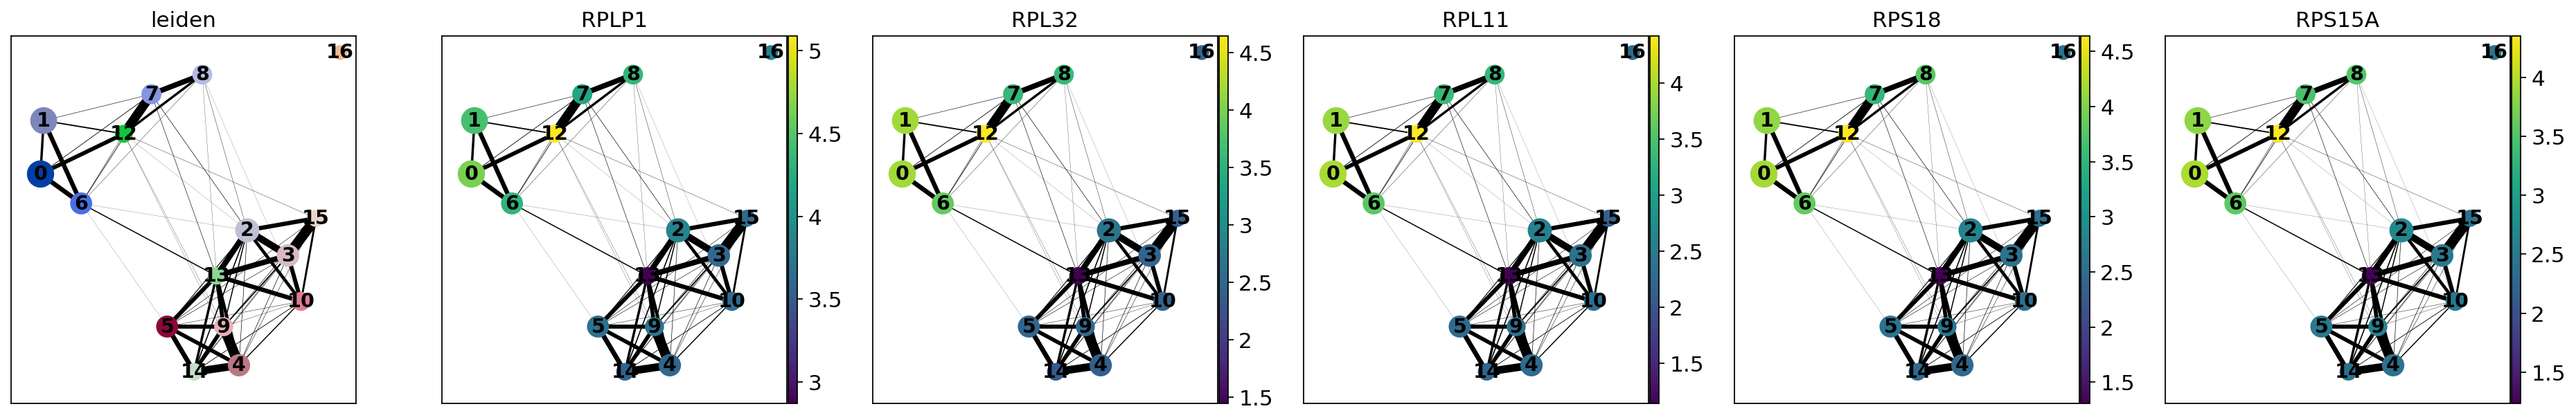

In [78]:
sc.pl.paga(adata, color=['leiden' ,'RPLP1','RPL32','RPL11','RPS18','RPS15A' ])

In [79]:
adata

AnnData object with n_obs × n_vars = 15190 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'B_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'dendrogram_Person', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'B_celltype_colors', 'recover_dynamics'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [86]:
sc.pl.umap(adata, color=['leiden', 
                               'CD19','FCER2','FCMR','SELL','IGHD','BCL2A1','EGR1','CD69',
                               'DUSP2','JUN','LMO2','GMDS','PRPSAP2','SERPINA9','MARCKSL1',
                               'HMGB2','TUBA1B','MKI67','UBE2C','AURKB'
                               ,'RPLP1','RPL32','RPL11','RPS18','RPS15A','CD19','FCER2','FCMR','SELL','IGHD'], legend_loc='on data')

Output hidden; open in https://colab.research.google.com to view.

In [88]:
import matplotlib.pyplot as pl

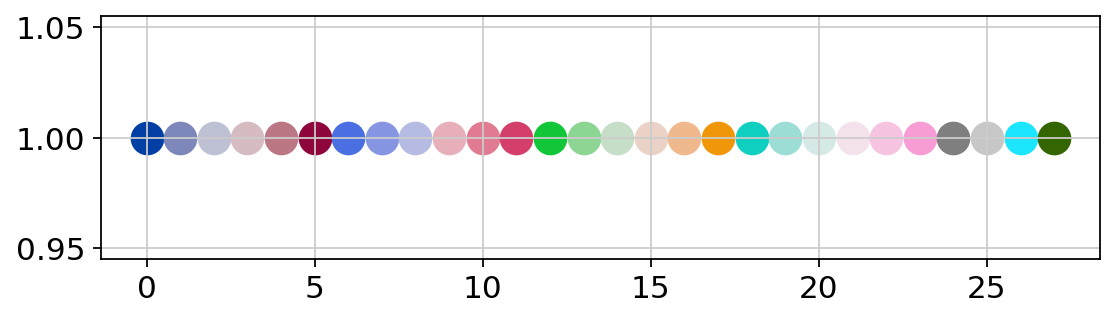

In [89]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()

In [90]:
adata

AnnData object with n_obs × n_vars = 15190 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'B_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'dendrogram_Person', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'B_celltype_colors', 'recover_dynamics'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [101]:
adata = scltnn.datasets.Pancreas()
adata

......Downloading dataset save to datasets/Pancreas.h5ad
......Creating directory datasets
......[Pancreas Size of file]: 169.62 MB
......[Downloader]: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>100.00%
.......Finish！8.084856510162354.2f s


AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [102]:
sc.tl.paga(adata, groups='clusters')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


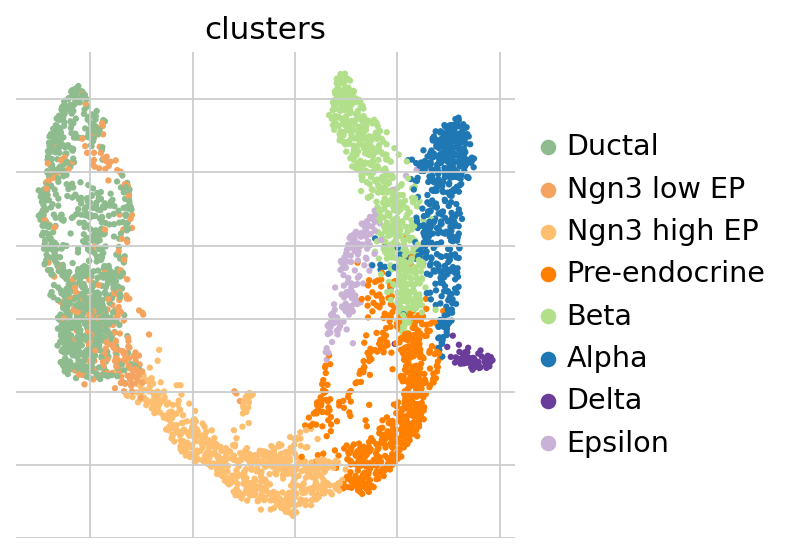

In [103]:
scv.pl.scatter(adata, basis="umap",color=['clusters'],
               cmap='PuRd',legend_loc='right margin')
               